
📊 Resumen de productos seleccionados:
     Código          Descripción  Unidades  Importe Total
17   000656               BRAVAS    1398.0       12090.18
22   001799          POLLO CAJÚN    1163.0       10519.86
27   001800  BASTONES DE BONIATO    1497.0        9435.59
137  001343        patatas extra     566.0        1543.64

🔹 Total de unidades vendidas: 4.624
🔹 Total facturado (€): 33.589.27
💡 Precio medio por unidad: 7.26 €


C:\Users\sgcov\AppData\Local\Temp\ipykernel_780\3039251843.py:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\sgcov\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


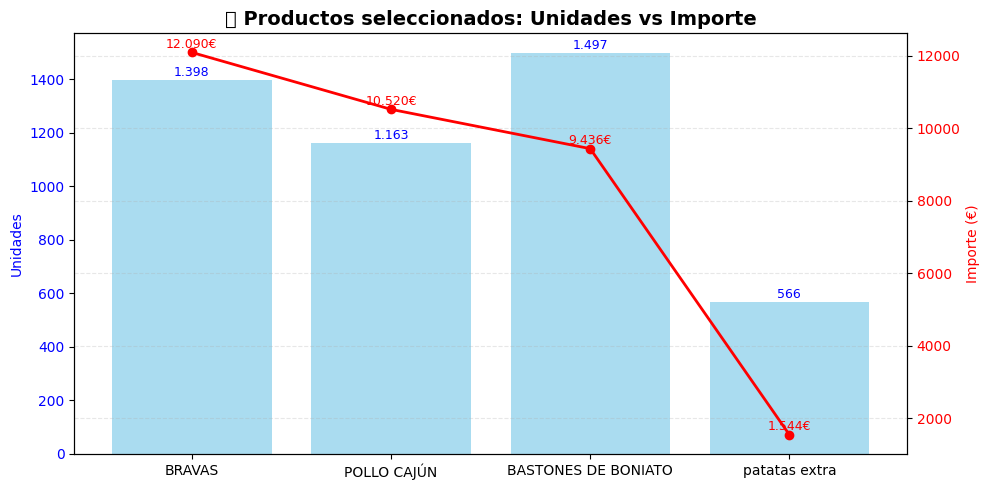

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# === 1️⃣ Leer CSV con separador flexible (dobles espacios o tabuladores) ===
df = pd.read_csv("ktlm01.csv", sep=r"\s{2,}|\t", engine="python", encoding="latin-1")

# Normalizamos nombres de columnas
df.columns = [str(c).strip() for c in df.columns]

# === 2️⃣ Función para limpiar números ===
def limpiar_numero(x):
    if pd.isna(x): 
        return 0.0
    s = str(x)
    s = re.sub(r"[^\d,.\-]", "", s)
    s = s.replace(".", "").replace(",", ".")
    try:
        return float(s)
    except:
        return 0.0

# Convertir las columnas necesarias a float
df["Unidades"] = df["Unidades"].apply(limpiar_numero)
df["Importe Total"] = df["Importe Total"].apply(limpiar_numero)

# === 3️⃣ Filtrar los productos ===
productos_objetivo = ["001800", "000656", "001799", "001343"]
df_filtrado = df[df["Código"].astype(str).str.zfill(6).isin(productos_objetivo)].copy()

# === 4️⃣ Totales ===
total_unidades = df_filtrado["Unidades"].sum()
total_importe = df_filtrado["Importe Total"].sum()

print("\n📊 Resumen de productos seleccionados:")
print(df_filtrado[["Código", "Descripción", "Unidades", "Importe Total"]])

print("\n🔹 Total de unidades vendidas:", f"{total_unidades:,.0f}".replace(",", "."))
print("🔹 Total facturado (€):", f"{total_importe:,.2f}".replace(",", "."))

if total_unidades > 0:
    print("💡 Precio medio por unidad:", f"{total_importe/total_unidades:.2f} €")

# === 5️⃣ Gráfico limpio ===
if not df_filtrado.empty:
    x = df_filtrado["Descripción"]
    unidades = df_filtrado["Unidades"].astype(float)
    importe = df_filtrado["Importe Total"].astype(float)

    fig, ax1 = plt.subplots(figsize=(10,5))
    ax1.bar(x, unidades, alpha=0.7, label="Unidades", color="skyblue")
    ax1.set_ylabel("Unidades", color="blue")
    ax1.tick_params(axis='y', labelcolor='blue')
    for i, v in enumerate(unidades):
        ax1.text(i, v + max(unidades)*0.01, f"{v:,.0f}".replace(",", "."), 
                 ha='center', color='blue', fontsize=9)

    ax2 = ax1.twinx()
    ax2.plot(x, importe, 'o-', linewidth=2, label="Importe (€)", color="red")
    ax2.set_ylabel("Importe (€)", color="red")
    ax2.tick_params(axis='y', labelcolor='red')
    for i, v in enumerate(importe):
        ax2.text(i, v + max(importe)*0.01, f"{v:,.0f}€".replace(",", "."), 
                 ha='center', color='red', fontsize=9)

    plt.title("📈 Productos seleccionados: Unidades vs Importe", fontsize=14, fontweight="bold")
    fig.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()

